# Library

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightgbm
from sklearn.svm import SVC

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import tunning, fe, describe
%reload_ext autoreload

# Load data

In [3]:
df = pd.read_csv(f'E:\gitlab\machine-learning\dataset\heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
describe.describe_data(df)

'table size 299 x 13'

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13 [00:00<?, ?it/s]

Dataframe has 13 columns.
There are 0 columns that have missing values.


,column_names,Data Type,Missing Values,% missing,low Value,Hi Value,stddev Value,unique
0,age,float64,0,0.0,40,95,12,47.0
1,anaemia,int64,0,0.0,0,1,0,2.0
2,creatinine_phosphokinase,int64,0,0.0,23,7861,970,208.0
3,diabetes,int64,0,0.0,0,1,0,2.0
4,ejection_fraction,int64,0,0.0,14,80,12,17.0
5,high_blood_pressure,int64,0,0.0,0,1,0,2.0
6,platelets,float64,0,0.0,25100,850000,97804,176.0
7,serum_creatinine,float64,0,0.0,0,9,1,40.0
8,serum_sodium,int64,0,0.0,113,148,4,27.0
9,sex,int64,0,0.0,0,1,0,2.0


In [5]:
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]
X_s, y_s = fe.imba(X, y,'smote')
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s,
                                                    test_size = 0.3, random_state=None)

Original ratio
DEATH_EVENT
0              203
1               96
dtype: int64

Number of neighbors to be considered for each sample 48

SMOTE ratio
DEATH_EVENT
0              203
1              203
dtype: int64


# Hypertunning Gradient search cross validation

In [24]:
param_grid = [{
    'max_depth':[6,8,10],
    'n_estimators':[60,80,100],
    'criterion': ["gini", "entropy"]
},
    {
    'max_depth':[6,8,10],
    'n_estimators':[60,80,100],
    'learning_rate': [0.1,1,10]
}
]

In [25]:
res_gs = tunning.gridsearch(X_train_s, y_train_s,param_grid,["random_forest",'gb'],
                           scoring='recall',cv=10)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameter for random_forest = 
criterion 		:	 gini
max_depth 		:	 10
n_estimators 		:	 100
------------------------------------------------------------------------

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.4s


Best parameter for gb = 
learning_rate 		:	 1
max_depth 		:	 6
n_estimators 		:	 60
------------------------------------------------------------------------



[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   11.1s finished


# Hypertunning random search cross validation

In [10]:
param_dist = [{
    "n_estimators":np.arange(100,900),
    "max_depth": [None,3,5,10,6,7],
    "min_samples_split":np.arange(2,20),
    "min_samples_leaf":np.arange(1,20),
    "max_features":["auto","sqrt"]
},
    {
    'max_depth':np.arange(5,10),
    'n_estimators':[60,80,100],
    'learning_rate': [0.1,1,10]
}]

In [13]:
res_rs = tunning.randomsearch(X_train_s, y_train_s,param_grid,["random_forest",'gb'],
                           scoring='recall',cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.7s finished


Best parameter for random_forest = 
n_estimators 		:	 411
min_samples_split 		:	 10
min_samples_leaf 		:	 2
max_features 		:	 auto
max_depth 		:	 10
------------------------------------------------------------------------

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s


Best parameter for gb = 
n_estimators 		:	 60
max_depth 		:	 5
learning_rate 		:	 1
------------------------------------------------------------------------



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished


# Hypertunning nature inspired algorithms cross validation

In [32]:
param_insp = [{
   'n_estimators': range(10, 80, 20),
   'max_depth': [2, 4, 6, 8, 10, 20],
   'min_samples_split': range(2, 8, 2),
   'max_features': ["auto", "sqrt", "log2"]
},
{
    'max_depth':np.arange(5,10),
    'n_estimators':[60,80,100],
    'learning_rate': [0.1,1,10]   
}]

In [58]:
res_ni = tunning.nature_inspired(X_train_s, y_train_s,param_insp,
                                 ["random_forest",'gb'],algo='ba',
                                 scoring='accuracy')

Fitting 10 folds for some of the 216 candidates, which might total in 2160 fits
Run 1/3, Iteration 1/100 | Stagnation 0/20 | There were 46 candidates trained until now
Run 1/3, Iteration 2/100 | Stagnation 1/20 | There were 57 candidates trained until now
Run 1/3, Iteration 3/100 | Stagnation 0/20 | There were 67 candidates trained until now
Run 1/3, Iteration 4/100 | Stagnation 1/20 | There were 74 candidates trained until now
Run 1/3, Iteration 5/100 | Stagnation 2/20 | There were 77 candidates trained until now
Run 1/3, Iteration 6/100 | Stagnation 3/20 | There were 78 candidates trained until now
Run 1/3, Iteration 7/100 | Stagnation 4/20 | There were 79 candidates trained until now
Run 1/3, Iteration 8/100 | Stagnation 5/20 | There were 79 candidates trained until now
Run 1/3, Iteration 9/100 | Stagnation 6/20 | There were 79 candidates trained until now
Run 1/3, Iteration 10/100 | Stagnation 7/20 | There were 79 candidates trained until now
Run 1/3, Iteration 11/100 | Stagnation 

Run 2/3, Iteration 1/100 | Stagnation 0/20 | There were 45 candidates trained until now
Run 2/3, Iteration 2/100 | Stagnation 1/20 | There were 45 candidates trained until now
Run 2/3, Iteration 3/100 | Stagnation 2/20 | There were 45 candidates trained until now
Run 2/3, Iteration 4/100 | Stagnation 3/20 | There were 45 candidates trained until now
Run 2/3, Iteration 5/100 | Stagnation 4/20 | There were 45 candidates trained until now
Run 2/3, Iteration 6/100 | Stagnation 0/20 | There were 45 candidates trained until now
Run 2/3, Iteration 7/100 | Stagnation 1/20 | There were 45 candidates trained until now
Run 2/3, Iteration 8/100 | Stagnation 2/20 | There were 45 candidates trained until now
Run 2/3, Iteration 9/100 | Stagnation 3/20 | There were 45 candidates trained until now
Run 2/3, Iteration 10/100 | Stagnation 4/20 | There were 45 candidates trained until now
Run 2/3, Iteration 11/100 | Stagnation 5/20 | There were 45 candidates trained until now
Run 2/3, Iteration 12/100 | St

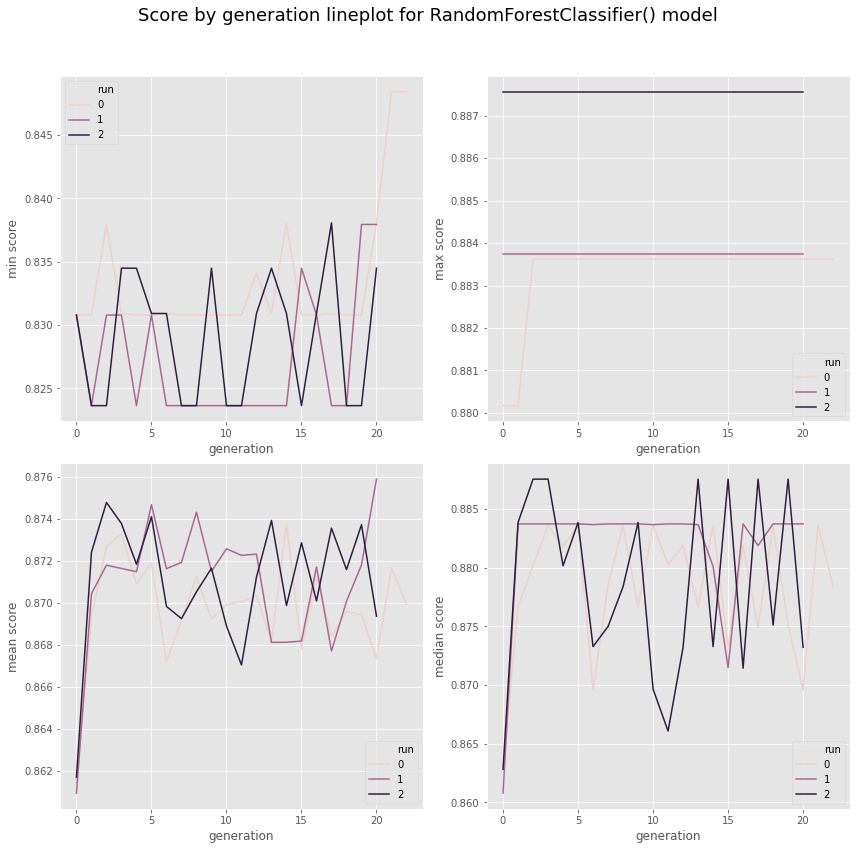

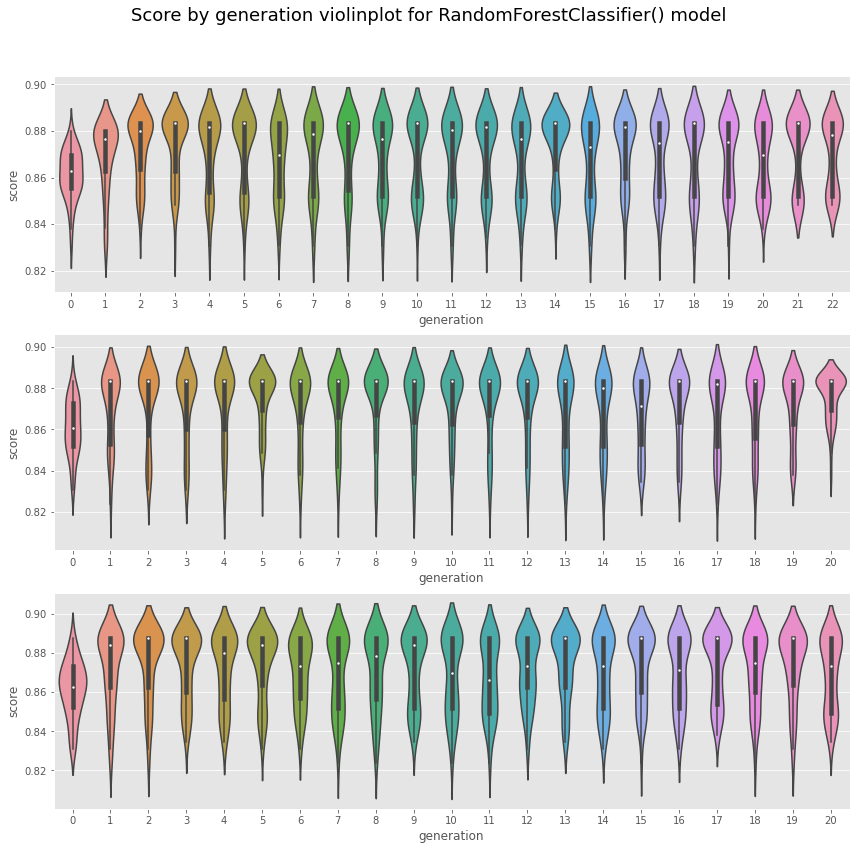

In [83]:
tunning.nature_inspired_plot(res_ni[0],run=3,footnote=None)

# Hypertunning Bayesian Optimization

In [29]:
categorical_features = ["anaemia","diabetes","high_blood_pressure","sex","smoking"]

In [92]:
def lgb_eval(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples, min_data_in_leaf):
    params = {
        "objective" : "binary",
        "metric" : "auc", 
        'is_unbalance': True,
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "num_threads" : 20,
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : 0.03,
        "subsample_freq" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1
    }
    lgtrain = lightgbm.Dataset(X_train_s, np.array(y_train_s.reset_index(drop=True)).flatten(),categorical_feature=categorical_features)
    cv_result = lightgbm.cv(params,
                       lgtrain,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['auc-mean'][-1]

In [95]:
param_bound={'num_leaves': (5, 40),
            'max_depth': (5, 63),
            'lambda_l2': (0.0, 0.05),
            'lambda_l1': (0.0, 0.05),
            'min_child_samples': (50, 100),
            'min_data_in_leaf': (10, 20)}

In [129]:
result = tunning.bayes_opt(lgb_eval,param_bound,n_iter=10,init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  0.9318   |  0.01666  |  0.0148   |  43.37    |  60.93    |  18.76    |  12.43    |
|  2        |  0.9337   |  0.002193 |  0.0442   |  29.76    |  83.63    |  19.98    |  25.41    |
|  3        |  0.9348   |  0.006815 |  0.03544  |  28.33    |  82.45    |  19.24    |  25.89    |
|  4        |  0.9319   |  0.04097  |  0.04448  |  26.72    |  82.34    |  17.22    |  24.31    |
|  5        |  0.9342   |  0.03142  |  0.01207  |  29.81    |  82.35    |  19.51    |  25.32    |
|  6        |  0.9343   |  0.04885  |  0.0389   |  29.03    |  78.48    |  19.18    |  28.43    |
|  7        |  0.9345   |  0.04373  |  0.04216  |  29.31    |  79.95    |  19.88    |  26.96    |
|  8        |  0.932    |  0.01904  |  0.01051  |  29.31    |  82.65    |  18.79    |  28.74    |
|  9        |  0.934

In [131]:
result

,parameters,values
0,lambda_l1,0.0068
1,lambda_l2,0.0354
2,max_depth,28.3257
3,min_child_samples,82.4513
4,min_data_in_leaf,19.2448
5,num_leaves,25.8915


# Hypertunning Bayesian Optimization version 2

In [ ]:
params = {
            # 'max_features': hp.choice('max_features', ['auto', 'sqrt']),
            'bootstrap' : hp.choice('bootstrap', [True, False]),
            'n_estimators': scope.int(hp.quniform('n_estimators', 5, 10, 1)),
            'max_depth': scope.int(hp.quniform('max_depth', 5, 10, 1)),
            # 'min_samples_split' : scope.int(hp.quniform('min_samples_split', 2, 10, 1)),
            # 'min_samples_leaf' : scope.int(hp.quniform('min_samples_leaf', 1, 5, 1))
            }

In [26]:
result = tunning.bayes_ho(X_train_s,y_train_s,params,10,'f1')

100%|███████████████████████████████████████████████| 10/10 [00:00<00:00, 10.20trial/s, best loss: 0.08771929824561397]


Best parameter from Bayesian Optimization
bootstrap 	:	 0
max_depth 	:	 5.0
n_estimators 	:	 9.0


In [27]:
result

,parameters,values
0,bootstrap,0.0
1,max_depth,5.0
2,n_estimators,9.0


# Hypertunning Bayesian Optimization version 3

pip install scikit-learn==0.23.2

In [6]:
from skopt.space import Real

In [7]:
params = {
              'C': Real(0.1, 1e+4),
              'gamma': Real(1e-6, 1e+1, 'log-uniform'),}

In [8]:
model = SVC()

In [29]:
cv,bp,be,best_model=tunning.bayes_os(X_train_s,y_train_s,model,params,n_iter=20,cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [24]:
bp

,params,values
0,C,10000.000000
1,gamma,0.000269


In [25]:
be

SVC(C=10000.0, gamma=0.0002688634700724339)

In [26]:
best_model

BayesSearchCV(cv=5, estimator=SVC(), n_iter=20,
              search_spaces={'C': Real(low=0.1, high=10000.0, prior='uniform', transform='identity'),
                             'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='identity')},
              verbose=3)

# Optuna

In [44]:
df = pd.read_csv(f'E:\gitlab\machine-learning\dataset\credit card\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
df,study = tunning.optuna_opt(df,'Class','xgb',cv=3,n_trials=1)

[22:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2021-12-06 22:10:11,024] Trial 0 finished with value: 0.9894209404210986 and parameters: {'n_estimators': 615, 'max_depth': 6, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 5, 'gamma': 1, 'learning_rate': 0.07612739753782988, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.9894209404210986.


Best trial: score 0.9894209404210986,
params {'n_estimators': 615, 'max_depth': 6, 'reg_alpha': 0, 'reg_lambda': 2, 'min_child_weight': 5, 'gamma': 1, 'learning_rate': 0.07612739753782988, 'colsample_bytree': 0.9}


[W 2021-12-06 22:10:12,133] Param colsample_bytree unique value length is less than 2.
[W 2021-12-06 22:10:12,144] Param colsample_bytree unique value length is less than 2.
[W 2021-12-06 22:10:12,156] Param colsample_bytree unique value length is less than 2.
[W 2021-12-06 22:10:12,164] Param colsample_bytree unique value length is less than 2.
[W 2021-12-06 22:10:12,174] Param colsample_bytree unique value length is less than 2.
[W 2021-12-06 22:10:12,184] Param colsample_bytree unique value length is less than 2.
[W 2021-12-06 22:10:12,194] Param colsample_bytree unique value length is less than 2.
[W 2021-12-06 22:10:12,204] Param gamma unique value length is less than 2.
[W 2021-12-06 22:10:12,217] Param gamma unique value length is less than 2.
[W 2021-12-06 22:10:12,227] Param gamma unique value length is less than 2.
[W 2021-12-06 22:10:12,227] Param gamma unique value length is less than 2.
[W 2021-12-06 22:10:12,235] Param gamma unique value length is less than 2.
[W 2021-12-